# K-MEAN CLUSTERING
- K-Means clustering intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. The objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import  matplotlib.pyplot as plt

In [4]:
cc=pd.read_csv('cc_data.csv')
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### DROPPING THE MISSING VALUES

In [5]:
cc = cc.dropna()

In [6]:
new_cc = cc.drop(['CUST_ID'],axis=1)
new_cc.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [7]:
### Normalizing the data
new_cc = normalize(new_cc)

In [12]:
from sklearn.cluster import KMeans
k_mean_model = KMeans(n_clusters=2)
k_mean_model.fit(new_cc)
labels = k_mean_model.predict(new_cc)

In [16]:
centroids =  k_mean_model.cluster_centers_
centroids


array([[9.68414677e-02, 2.38674119e-04, 2.18413654e-01, 1.11047822e-01,
        1.07495901e-01, 2.20769893e-02, 1.81292253e-04, 4.97222561e-05,
        1.42884117e-04, 7.61431586e-06, 1.22167525e-04, 3.81647474e-03,
        8.40897566e-01, 2.39619361e-01, 5.83714240e-02, 7.97237332e-05,
        3.35503077e-03],
       [4.22823602e-01, 2.62388338e-04, 8.33412915e-02, 4.37138596e-02,
        3.96815611e-02, 2.70546688e-01, 7.80446434e-05, 2.76872185e-05,
        5.54853457e-05, 5.61141776e-05, 1.19945930e-03, 1.77112323e-03,
        6.24885317e-01, 2.93974427e-01, 2.16164987e-01, 7.26744058e-06,
        3.16907918e-03]])

In [17]:
# for dimension reduction we can use pca
from sklearn.decomposition import PCA
from sklearn.preprocessing  import StandardScaler

In [20]:
pca = PCA(2)
pcafit = pca.fit(new_cc)
pcacc = pcafit.fit_transform(new_cc)

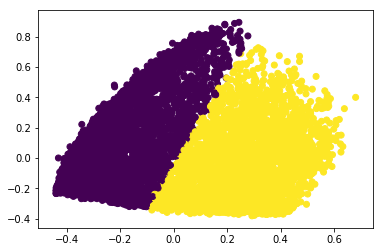

In [23]:
plt.scatter(pcacc[:,0],pcacc[:,-1],c=labels)

### For IMAGE DATA

In [24]:
## get TNR IMAGE inside datasets 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
import warnings
warnings.filterwarnings('ignore')

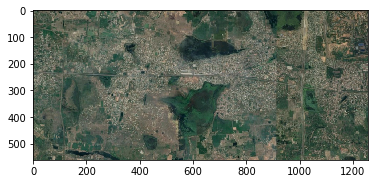

In [28]:
# Read the image file
img = ndimage.imread('TNR.jpg')
plt.figure()
plt.imshow(img)

In [29]:
x,y,z = img.shape

In [30]:
img_new = img.reshape(x*y,z)
img_new

array([[99, 97, 84],
       [88, 86, 73],
       [77, 78, 64],
       ...,
       [61, 79, 63],
       [66, 83, 67],
       [56, 73, 57]], dtype=uint8)

In [31]:
model = KMeans(n_clusters=3)
model.fit(img_new)
labels = model.predict(img_new)

In [33]:
centroids = model.cluster_centers_
centroids = centroids.astype(int)

In [34]:
lab = model.labels_
lab

array([1, 1, 1, ..., 0, 0, 0])

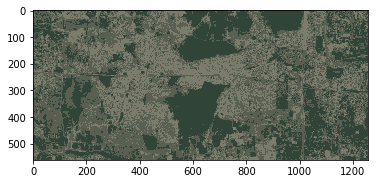

In [35]:
final = centroids[lab].reshape(x,y,z)
plt.figure()
plt.imshow(centroids[lab].reshape(x,y,z))

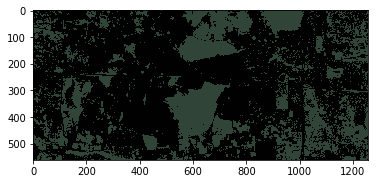

In [36]:
np.place(final, final==centroids[1],1)
np.place(final, final==centroids[2],1)
plt.figure()
plt.imshow(final)

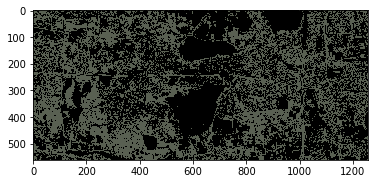

In [37]:
final1 = centroids[lab].reshape(x,y,z)

np.place(final1, final1==centroids[0],0)

np.place(final1, final1==centroids[2],0)
plt.figure()
plt.imshow(final1)

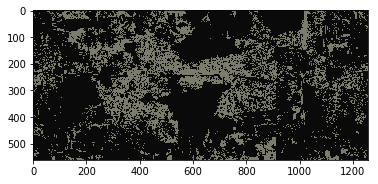

In [38]:
final2 = centroids[lab].reshape(x,y,z)
np.place(final2, final2==centroids[0],10)
np.place(final2, final2==centroids[1],10)
plt.figure()
plt.imshow(final2)